In [ ]:
#import libraries

import pandas as pd
import matplotlib as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import all fact and dimension csvs

impact_fact = pd.read_csv( "impact_fact.csv")
ingredient_dim = pd.read_csv('ingredient_dim.csv')
product_characteristics_dim = pd.read_csv('product_characteristics_dim.csv')
product_dim = pd.read_csv('product_dim.csv')
user_characteristics_dim = pd.read_csv('user_characteristics_dim.csv')
user_dim = pd.read_csv('user_dim.csv')

## Get a preview of the data in all the tables

In [ ]:
impact_fact.head()

,ingredient_id,product_id,user_id,user_char_id,product_char_id,price,user_price_point,rating_stars,rating,harmful_score,num_harmful_ingredients,num_ingredients,impact_id
0,7.285072e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,1,80,1-impact
1,3.685921e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,1,80,3-impact
2,8.858978e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,1,80,5-impact
3,7.062694e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,1,80,7-impact
4,8.065860e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,1,80,9-impact


In [ ]:
ingredient_dim.head()

,ingredient_id,ingredient
0,6.823198e+08,sodium cocoyl glutamate
1,5.467281e+08,butylene glycol
2,6.277821e+09,medicago sativa (alfalfa) extract
3,9.014918e+09,natural fragrance
4,7.756873e+09,potassium sorbate


In [ ]:
product_characteristics_dim.head()

,product_char_id,product_id,combination,dry,normal,oily,sensitive
0,0-characteristic,0,0,1,0,1,1
1,2-characteristic,2,1,1,1,1,1
2,4-characteristic,4,1,1,1,1,1
3,6-characteristic,6,1,1,1,1,1
4,8-characteristic,8,0,0,0,0,0


In [ ]:
product_dim.head()

,product_id,product,brand,category
0,0,100 percent Pure Argan Oil,JOSIE MARAN,Moisturizer
1,2,3% Glycolic Solutions Cleanser,PETER THOMAS ROTH,Cleanser
2,4,5 in 1 Face Cream SPF 30,FIRST AID BEAUTY,Moisturizer
3,6,8% Glycolic Solutions Toner,PETER THOMAS ROTH,Cleanser
4,8,Acne Body Wash,MURAD,Treatment


In [ ]:
user_characteristics_dim.head()

,user_char_id,user_id,skin_tone,skin_type,eye_color,hair_color
0,2483-characteristic,2483,Medium,Combination,Brown,Red
1,4497-characteristic,4497,Fair,Dry,Blue,Blonde
2,3008-characteristic,3008,No data,No data,No data,No data
3,4742-characteristic,4742,Tan,Dry,Brown,Black
4,6594-characteristic,6594,Light,Combination,Blue,Blonde


In [ ]:
user_dim.head()

,user_id,username
0,3420,allyp3
1,2715,Sabi1991
2,5017,kimkix34
3,3776,britcorm
4,5021,kimmydoodles


In [ ]:
#make sure data types are the same for user id column

user_dim['user_id'] = user_dim['user_id'].astype(str)
user_characteristics_dim['user_id'] = user_characteristics_dim['user_id'].astype(str)
impact_fact['user_id'] = impact_fact['user_id'].astype(str)

## Create a master dataset to use for recommendations

In [ ]:
#merge the characteristics data with the impact data
fulldf = pd.merge(impact_fact, user_characteristics_dim, on='user_char_id', how='left')
fulldf = pd.merge(fulldf, product_characteristics_dim, on='product_char_id', how='left')
fulldf.head()

,ingredient_id,product_id_x,user_id_x,user_char_id,product_char_id,price,user_price_point,rating_stars,rating,harmful_score,...,skin_tone,skin_type,eye_color,hair_color,product_id_y,combination,dry,normal,oily,sensitive
0,7.285072e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,Light,Combination,Brown,Black,189,0,0,0,0,0
1,3.685921e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,Light,Combination,Brown,Black,189,0,0,0,0,0
2,8.858978e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,Light,Combination,Brown,Black,189,0,0,0,0,0
3,7.062694e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,Light,Combination,Brown,Black,189,0,0,0,0,0
4,8.065860e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,Light,Combination,Brown,Black,189,0,0,0,0,0


In [ ]:
fulldf = pd.merge(fulldf, product_dim, left_on='product_id_x', right_on='product_id', how='left')
fulldf.head()

,ingredient_id,product_id_x,user_id_x,user_char_id,product_char_id,price,user_price_point,rating_stars,rating,harmful_score,...,product_id_y,combination,dry,normal,oily,sensitive,product_id,product,brand,category
0,7.285072e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,189,0,0,0,0,0,189,Perfectionist CP+R Wrinkle Lifting/Firming Serum,ESTÉE LAUDER,Treatment
1,3.685921e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,189,0,0,0,0,0,189,Perfectionist CP+R Wrinkle Lifting/Firming Serum,ESTÉE LAUDER,Treatment
2,8.858978e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,189,0,0,0,0,0,189,Perfectionist CP+R Wrinkle Lifting/Firming Serum,ESTÉE LAUDER,Treatment
3,7.062694e+09,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,189,0,0,0,0,0,189,Perfectionist CP+R Wrinkle Lifting/Firming Serum,ESTÉE LAUDER,Treatment
4,8.065860e+08,189,6858,6858-characteristic,189-characteristic,8,98,3,4.3,0.0125,...,189,0,0,0,0,0,189,Perfectionist CP+R Wrinkle Lifting/Firming Serum,ESTÉE LAUDER,Treatment


In [ ]:
#view descriptive statistics for all the numeric data in the master dataset

fulldf.describe()

,ingredient_id,product_id_x,price,user_price_point,rating_stars,rating,harmful_score,num_harmful_ingredients,num_ingredients,product_id_y,combination,dry,normal,oily,sensitive,product_id
count,1.305722e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06,1.435154e+06
mean,4.723726e+09,1.649085e+02,5.221834e+01,5.629368e+01,4.351594e+00,4.269677e+00,6.056702e-02,2.441443e+00,4.123589e+01,1.649085e+02,7.695808e-01,5.997496e-01,7.202642e-01,6.886125e-01,5.035062e-01,1.649085e+02
std,2.859137e+09,8.904772e+01,3.964232e+01,4.193028e+01,1.225308e+00,4.301164e-01,7.705235e-02,2.642010e+00,2.062900e+01,8.904772e+01,4.211013e-01,4.899492e-01,4.488695e-01,4.630610e-01,4.999879e-01,8.904772e+01
min,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.079587e+09,9.300000e+01,2.800000e+01,2.900000e+01,4.000000e+00,4.200000e+00,0.000000e+00,0.000000e+00,2.500000e+01,9.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e+01
50%,4.690186e+09,1.740000e+02,4.000000e+01,4.000000e+01,5.000000e+00,4.300000e+00,4.651163e-02,2.000000e+00,3.900000e+01,1.740000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.740000e+02
75%,7.293209e+09,2.460000e+02,6.500000e+01,6.500000e+01,5.000000e+00,4.400000e+00,7.894737e-02,4.000000e+00,5.400000e+01,2.460000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.460000e+02
max,9.993194e+09,3.140000e+02,3.700000e+02,3.700000e+02,5.000000e+00,4.900000e+00,4.090909e-01,1.000000e+01,1.150000e+02,3.140000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.140000e+02


In [ ]:
#view datatypes and general info about the master dataset

fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435154 entries, 0 to 1435153
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ingredient_id            1305722 non-null  float64
 1   product_id_x             1435154 non-null  int64  
 2   user_id_x                1435154 non-null  object 
 3   user_char_id             1435154 non-null  object 
 4   product_char_id          1435154 non-null  object 
 5   price                    1435154 non-null  int64  
 6   user_price_point         1435154 non-null  int64  
 7   rating_stars             1435154 non-null  int64  
 8   rating                   1435154 non-null  float64
 9   harmful_score            1435154 non-null  float64
 10  num_harmful_ingredients  1435154 non-null  int64  
 11  num_ingredients          1435154 non-null  int64  
 12  impact_id                1435154 non-null  object 
 13  user_id_y                1435154 non-null 

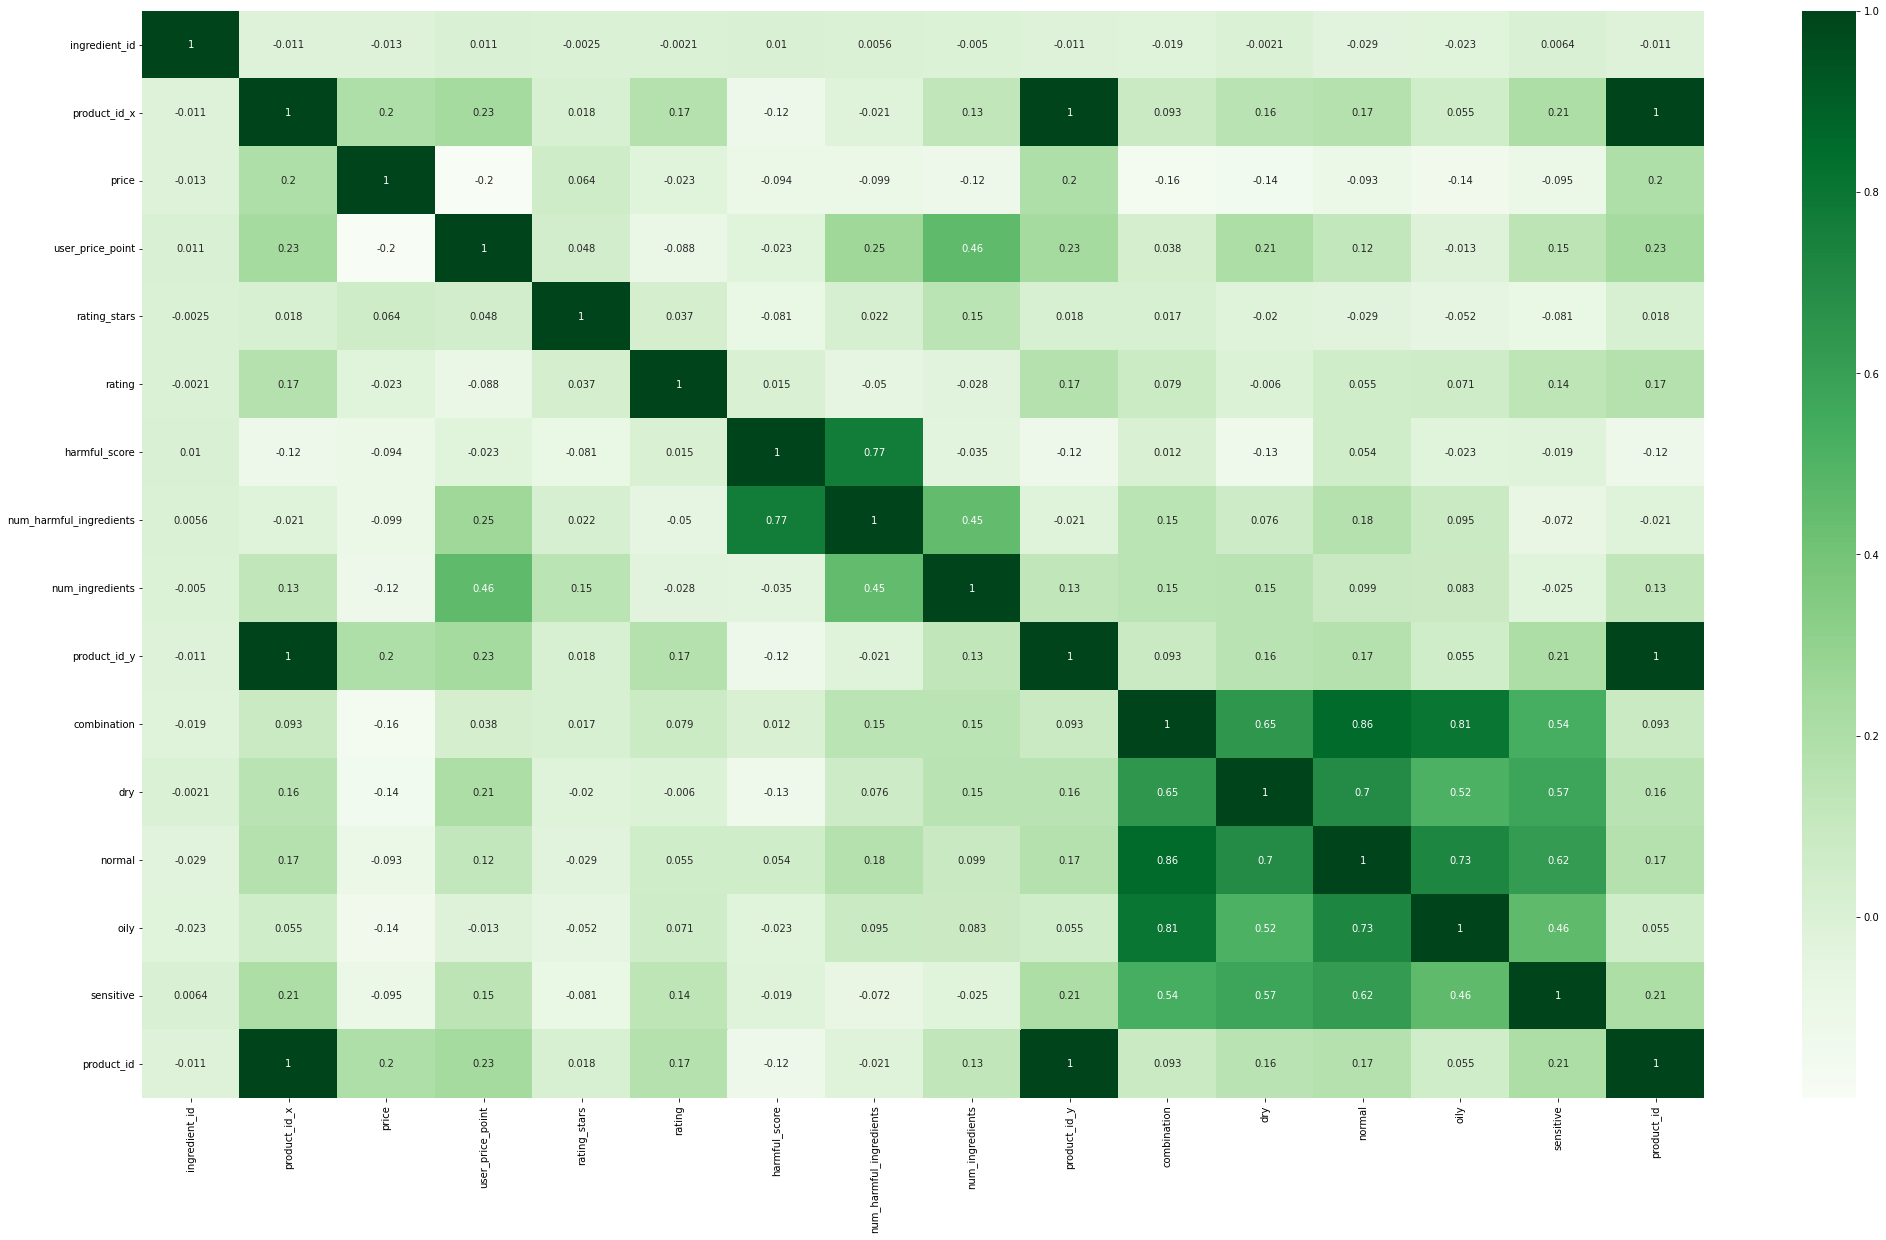

In [ ]:
#exploring the correlations between all the numeric variables - Harmful score has no strong correlations with any numeric variables

corrMatrix = fulldf.select_dtypes(include=['float64','int64']).iloc[:, 0:].corr()
plt.subplots(figsize=(35,20))

sns.heatmap(corrMatrix, annot=True, cmap = 'Greens')
plt.show()

In [ ]:
#categories of beauty products that a customer could request
fulldf['category'].unique()

array(['Treatment', 'Cleanser', 'Moisturizer', 'Face Mask'], dtype=object)

In [ ]:
#filter out the products with a harmful score > 0 so we can recommend from a database of only non-harmful products
good_products_df = fulldf.copy()
good_products_df = good_products_df[good_products_df["harmful_score"] == 0]
good_products_df

,ingredient_id,product_id_x,user_id_x,user_char_id,product_char_id,price,user_price_point,rating_stars,rating,harmful_score,...,product_id_y,combination,dry,normal,oily,sensitive,product_id,product,brand,category
8013,3.416935e+09,263,3736,3736-characteristic,263-characteristic,115,95,5,4.4,0.0,...,263,1,1,1,1,1,263,The Essence Plumping Skin Softener,TATCHA,Moisturizer
8014,8.136185e+09,263,3736,3736-characteristic,263-characteristic,115,95,5,4.4,0.0,...,263,1,1,1,1,1,263,The Essence Plumping Skin Softener,TATCHA,Moisturizer
8015,NaN,263,3736,3736-characteristic,263-characteristic,115,95,5,4.4,0.0,...,263,1,1,1,1,1,263,The Essence Plumping Skin Softener,TATCHA,Moisturizer
8016,6.685055e+09,263,3736,3736-characteristic,263-characteristic,115,95,5,4.4,0.0,...,263,1,1,1,1,1,263,The Essence Plumping Skin Softener,TATCHA,Moisturizer
8017,3.315136e+09,263,3736,3736-characteristic,263-characteristic,115,95,5,4.4,0.0,...,263,1,1,1,1,1,263,The Essence Plumping Skin Softener,TATCHA,Moisturizer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435149,9.837091e+09,117,4588,4588-characteristic,117-characteristic,80,10,3,4.9,0.0,...,117,0,0,0,0,0,117,Facial Cotton,SHISEIDO,Cleanser
1435150,9.837091e+09,117,4588,4588-characteristic,117-characteristic,80,10,3,4.9,0.0,...,117,0,0,0,0,0,117,Facial Cotton,SHISEIDO,Cleanser
1435151,9.837091e+09,117,4588,4588-characteristic,117-characteristic,80,10,3,4.9,0.0,...,117,0,0,0,0,0,117,Facial Cotton,SHISEIDO,Cleanser
1435152,9.837091e+09,117,4588,4588-characteristic,117-characteristic,80,10,3,4.9,0.0,...,117,0,0,0,0,0,117,Facial Cotton,SHISEIDO,Cleanser


In [ ]:
#list columns in non-harmful dataset
good_products_df.columns



Index(['ingredient_id', 'product_id_x', 'user_id_x', 'user_char_id',
       'product_char_id', 'price', 'user_price_point', 'rating_stars',
       'rating', 'harmful_score', 'num_harmful_ingredients', 'num_ingredients',
       'impact_id', 'user_id_y', 'skin_tone', 'skin_type', 'eye_color',
       'hair_color', 'product_id_y', 'combination', 'dry', 'normal', 'oily',
       'sensitive', 'product_id', 'product', 'brand', 'category'],
      dtype='object')

In [ ]:
#get rid of unnecessary columns

df_baskets = good_products_df[['user_id_x','product','price', 'rating_stars', 'rating', 'skin_tone','skin_type',
                                       'eye_color','hair_color','combination','dry','normal','oily',
                                       'sensitive','brand','category']]
df_baskets.head()

,user_id_x,product,price,rating_stars,rating,skin_tone,skin_type,eye_color,hair_color,combination,dry,normal,oily,sensitive,brand,category
8013,3736,The Essence Plumping Skin Softener,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
8014,3736,The Essence Plumping Skin Softener,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
8015,3736,The Essence Plumping Skin Softener,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
8016,3736,The Essence Plumping Skin Softener,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
8017,3736,The Essence Plumping Skin Softener,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer


In [ ]:
#using groupby() and agg() to calculate some summary statistics for the products
#https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas

df = good_products_df.copy()
df.groupby('product').agg(
    avg_price=('price', 'mean'),
    avg_rating=('rating', 'mean'),
    skin_tone=('skin_tone','nunique'),
    skin_type=('skin_type', 'nunique'),
    eye_color=('eye_color', 'nunique'),
    hair_color=('hair_color','nunique'),
    combination=('combination', 'count'),
    dry=('dry', 'count'),
    normal=('normal', 'count'),
    oily=('oily', 'count'),
    sensitive=('sensitive', 'count'),
    brand=('brand','count'),
    category=('category','nunique')
).sort_values(by='avg_price', ascending=False).head(10)

,avg_price,avg_rating,skin_tone,skin_type,eye_color,hair_color,combination,dry,normal,oily,sensitive,brand,category
product,,,,,,,,,,,,,
Squalane + Vitamin C Rose Oil,370.0,4.4,6,5,5,4,2208,2208,2208,2208,2208,2208,1
Snow Mushroom Water Serum,158.0,4.7,7,5,5,6,3300,3300,3300,3300,3300,3300,1
Colored Clay CC Undereye Corrector,145.0,4.2,5,5,5,5,1260,1260,1260,1260,1260,1260,1
Blackhead Solutions 7 Day Deep Pore Cleanse & Scrub,135.0,4.2,7,5,6,4,6700,6700,6700,6700,6700,6700,1
"Take The Day Off Makeup Remover For Lids, Lashes & Lips",116.0,4.6,6,4,5,5,5746,5746,5746,5746,5746,5746,1
The Essence Plumping Skin Softener,115.0,4.4,7,5,5,5,484,484,484,484,484,484,1
Superberry Hydrate + Glow Oil,105.0,4.8,8,5,5,4,1602,1602,1602,1602,1602,1602,1
Coconut Rose Toner,100.0,4.5,6,5,6,5,798,798,798,798,798,798,1
Sheer Transformation® Perfecting Moisturizer,100.0,4.2,7,4,5,4,88,88,88,88,88,88,1


## Recommendation Engine

In [ ]:
#create an item matrix. The primary component of our recommendation engine is a matrix. 

df_items = df_baskets.pivot_table(index=['category', 'brand', 'skin_tone','skin_type',
                                       'eye_color','hair_color','combination','dry','normal','oily',
                                       'sensitive'], columns=['product'], values='price').fillna(0)
df_items

product                                                                                                         100 percent Pure Argan Oil  \
category  brand               skin_tone skin_type   eye_color hair_color combination dry normal oily sensitive                               
Cleanser  ALGENIST            Dark      Dry         Brown     Brunette   0           0   0      0    0                                 0.0   
                              Fair      Dry         Brown     Black      0           0   0      0    0                                 0.0   
                                                    Green     Brunette   0           0   0      0    0                                 0.0   
                                        Oily        Blue      Blonde     0           0   0      0    0                                 0.0   
                              Light     Combination Brown     Black      0           0   0      0    0                                 0.0   
...                                                                                                                                    ...   
Treatment YOUTH TO THE PEOPLE Medium    Combination Brown     Brunette   1           1   1      1    1                                 0.0   
                                        Dry         Green     Brunette   1           1   1      1    1                                 0.0   
                              No data   No data     No data   No data    1           1   1      1    1                                 0.0   
                              Tan       Combination Brown     Black      1           1   1      1    1                                 0.0   
                                        Normal      Brown     Brunette   1           1   1      1    1                                 0.0   

product                                                                                                         100 percent Pure Argan Oil Light  \
category  brand               skin_tone skin_type   eye_color hair_color combination dry normal oily sensitive                                     
Cleanser  ALGENIST            Dark      Dry         Brown     Brunette   0           0   0      0    0                                       0.0   
                              Fair      Dry         Brown     Black      0           0   0      0    0                                       0.0   
                                                    Green     Brunette   0           0   0      0    0                                       0.0   
                                        Oily        Blue      Blonde     0           0   0      0    0                                       0.0   
                              Light     Combination Brown     Black      0           0   0      0    0                                       0.0   
...                                                                                                                                          ...   
Treatment YOUTH TO THE PEOPLE Medium    Combination Brown     Brunette   1           1   1      1    1                                       0.0   
                                        Dry         Green     Brunette   1           1   1      1    1                                       0.0   
                              No data   No data     No data   No data    1           1   1      1    1                                       0.0   
                              Tan       Combination Brown     Black      1           1   1      1    1                                       0.0   
                                        Normal      Brown     Brunette   1           1   1      1    1                                       0.0   

product                                                                                                         3 Muslin Cloths  \
category  brand               skin_tone skin_type   eye_color hair_color combination dry normal o

In [ ]:
#create a helper function for our recommendation system to identify which products are associated with others by finding correlations.

def get_recommendations(df, item):
    
    recommendations = df.corrwith(df[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    #only return the 6 highest correlations as the recommended products (the highest correlation will be the product entered by the user)
    return recommendations.nlargest(n=6, columns=['correlation'])

In [ ]:
#test recommendation engine by inserting user input (product name)
recommendations = get_recommendations(df_items, '100 percent Pure Argan Oil')
recommendations

,product,correlation
0,100 percent Pure Argan Oil,1.000000
15,Benefiance NutriPerfect Night Cream,-0.004841
48,Deep Dive™ Glycolic Facial Cleanser,-0.005135
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.005680
39,Coconut Melt,-0.005680
50,Detoxifying Black Charcoal Cleanser,-0.005933


In [ ]:
#list categories of products in the database
good_products_df['category'].unique()

array(['Moisturizer', 'Treatment', 'Cleanser', 'Face Mask'], dtype=object)

In [ ]:
#find a moisturizer to use as a test
good_products_df['product'].loc[good_products_df['category'] == 'Moisturizer']

8013                   The Essence Plumping Skin Softener
8014                   The Essence Plumping Skin Softener
8015                   The Essence Plumping Skin Softener
8016                   The Essence Plumping Skin Softener
8017                   The Essence Plumping Skin Softener
                                ...                      
1434935    Micro Essence Skin Activating Treatment Lotion
1434936    Micro Essence Skin Activating Treatment Lotion
1434937    Micro Essence Skin Activating Treatment Lotion
1434938    Micro Essence Skin Activating Treatment Lotion
1434939    Micro Essence Skin Activating Treatment Lotion
Name: product, Length: 190358, dtype: object

In [ ]:
#find a treatment product to use as a test
good_products_df['product'].loc[good_products_df['category'] == 'Treatment']

22533          Luminous Deep Hydration Firming Serum
22537          Luminous Deep Hydration Firming Serum
22541          Luminous Deep Hydration Firming Serum
22545          Luminous Deep Hydration Firming Serum
22549          Luminous Deep Hydration Firming Serum
                             ...                    
1389554    Advanced Génifique Youth Activating Serum
1389555    Advanced Génifique Youth Activating Serum
1389556    Advanced Génifique Youth Activating Serum
1389557    Advanced Génifique Youth Activating Serum
1389558    Advanced Génifique Youth Activating Serum
Name: product, Length: 42210, dtype: object

In [ ]:
#find a cleanser to use as a test
good_products_df['product'].loc[good_products_df['category'] == 'Cleanser']

124864          Cleanser
124865          Cleanser
124866          Cleanser
124867          Cleanser
124868          Cleanser
               ...      
1435149    Facial Cotton
1435150    Facial Cotton
1435151    Facial Cotton
1435152    Facial Cotton
1435153    Facial Cotton
Name: product, Length: 231588, dtype: object

In [ ]:
#find a face mask to use as a test
good_products_df['product'].loc[good_products_df['category'] == 'Face Mask']

566841    Time Freeze Sleeping Mask
566842    Time Freeze Sleeping Mask
566843    Time Freeze Sleeping Mask
566844    Time Freeze Sleeping Mask
566845    Time Freeze Sleeping Mask
                    ...            
654359    Time Freeze Sleeping Mask
654362    Time Freeze Sleeping Mask
654365    Time Freeze Sleeping Mask
654368    Time Freeze Sleeping Mask
654371    Time Freeze Sleeping Mask
Name: product, Length: 840, dtype: object

In [ ]:
#test moisturizer recommendations
moisturizers = get_recommendations(df_items, 'The Essence Plumping Skin Softener')
moisturizers['product_group'] = 'The Essence Plumping Skin Softener'
moisturizers

,product,correlation,product_group
131,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener
70,Gold Camellia Beauty Oil,0.304878,The Essence Plumping Skin Softener
15,Benefiance NutriPerfect Night Cream,-0.004703,The Essence Plumping Skin Softener
48,Deep Dive™ Glycolic Facial Cleanser,-0.004990,The Essence Plumping Skin Softener
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.005518,The Essence Plumping Skin Softener
39,Coconut Melt,-0.005518,The Essence Plumping Skin Softener


In [ ]:
#test treatment recommendations
treatment = get_recommendations(df_items, 'Luminous Deep Hydration Firming Serum')
treatment['product_group'] = 'Luminous Deep Hydration Firming Serum'
treatment

,product,correlation,product_group
81,Luminous Deep Hydration Firming Serum,1.000000,Luminous Deep Hydration Firming Serum
15,Benefiance NutriPerfect Night Cream,-0.004562,Luminous Deep Hydration Firming Serum
48,Deep Dive™ Glycolic Facial Cleanser,-0.004840,Luminous Deep Hydration Firming Serum
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.005353,Luminous Deep Hydration Firming Serum
39,Coconut Melt,-0.005353,Luminous Deep Hydration Firming Serum
50,Detoxifying Black Charcoal Cleanser,-0.005592,Luminous Deep Hydration Firming Serum


In [ ]:
#test cleanser recommendations
cleanser = get_recommendations(df_items, 'Cleanser')
cleanser['product_group'] = 'Cleanser'
cleanser

,product,correlation,product_group
32,Cleanser,1.000000,Cleanser
15,Benefiance NutriPerfect Night Cream,-0.004110,Cleanser
48,Deep Dive™ Glycolic Facial Cleanser,-0.004360,Cleanser
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.004822,Cleanser
39,Coconut Melt,-0.004822,Cleanser
50,Detoxifying Black Charcoal Cleanser,-0.005037,Cleanser


In [ ]:
#test face mask recommendations
mask = get_recommendations(df_items, 'Time Freeze Sleeping Mask')
mask['product_group'] = 'Time Freeze Sleeping Mask'

In [ ]:
#put all sample recommendations into 1 table
recommendation_sample = moisturizers.append(treatment).append(cleanser).append(mask)
recommendation_sample

,product,correlation,product_group
131,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener
70,Gold Camellia Beauty Oil,0.304878,The Essence Plumping Skin Softener
15,Benefiance NutriPerfect Night Cream,-0.004703,The Essence Plumping Skin Softener
48,Deep Dive™ Glycolic Facial Cleanser,-0.004990,The Essence Plumping Skin Softener
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.005518,The Essence Plumping Skin Softener
39,Coconut Melt,-0.005518,The Essence Plumping Skin Softener
81,Luminous Deep Hydration Firming Serum,1.000000,Luminous Deep Hydration Firming Serum
15,Benefiance NutriPerfect Night Cream,-0.004562,Luminous Deep Hydration Firming Serum
48,Deep Dive™ Glycolic Facial Cleanser,-0.004840,Luminous Deep Hydration Firming Serum
103,Powerful-Strength Line-Reducing Concentrate 12...,-0.005353,Luminous Deep Hydration Firming Serum


In [ ]:
#create a dataset with a full set of columns that the user may want to see with their product recommendations (e.g. price)
full_recommendations = pd.merge(recommendation_sample, df_baskets, on='product', how='left')
full_recommendations

,product,correlation,product_group,user_id_x,price,rating_stars,rating,skin_tone,skin_type,eye_color,hair_color,combination,dry,normal,oily,sensitive,brand,category
0,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
1,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
2,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
3,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
4,The Essence Plumping Skin Softener,1.000000,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32274,Detoxifying Black Charcoal Cleanser,-0.005933,Time Freeze Sleeping Mask,771,50,4,4.3,Fair,Combination,Hazel,Brunette,1,0,1,1,1,BOSCIA,Cleanser
32275,Detoxifying Black Charcoal Cleanser,-0.005933,Time Freeze Sleeping Mask,771,50,4,4.3,Fair,Combination,Hazel,Brunette,1,0,1,1,1,BOSCIA,Cleanser
32276,Detoxifying Black Charcoal Cleanser,-0.005933,Time Freeze Sleeping Mask,771,50,4,4.3,Fair,Combination,Hazel,Brunette,1,0,1,1,1,BOSCIA,Cleanser
32277,Detoxifying Black Charcoal Cleanser,-0.005933,Time Freeze Sleeping Mask,771,50,4,4.3,Fair,Combination,Hazel,Brunette,1,0,1,1,1,BOSCIA,Cleanser


In [ ]:
full_recommendations2 = pd.merge(recommendation_sample, df_baskets, on='product', how='right')
full_recommendations2

,product,correlation,product_group,user_id_x,price,rating_stars,rating,skin_tone,skin_type,eye_color,hair_color,combination,dry,normal,oily,sensitive,brand,category
0,The Essence Plumping Skin Softener,1.0,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
1,The Essence Plumping Skin Softener,1.0,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
2,The Essence Plumping Skin Softener,1.0,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
3,The Essence Plumping Skin Softener,1.0,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
4,The Essence Plumping Skin Softener,1.0,The Essence Plumping Skin Softener,3736,115,5,4.4,Fair,Dry,Green,Blonde,1,1,1,1,1,TATCHA,Moisturizer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486141,Facial Cotton,NaN,NaN,4588,80,3,4.9,Fair,Combination,Brown,Brunette,0,0,0,0,0,SHISEIDO,Cleanser
486142,Facial Cotton,NaN,NaN,4588,80,3,4.9,Fair,Combination,Brown,Brunette,0,0,0,0,0,SHISEIDO,Cleanser
486143,Facial Cotton,NaN,NaN,4588,80,3,4.9,Fair,Combination,Brown,Brunette,0,0,0,0,0,SHISEIDO,Cleanser
486144,Facial Cotton,NaN,NaN,4588,80,3,4.9,Fair,Combination,Brown,Brunette,0,0,0,0,0,SHISEIDO,Cleanser


## Save dataframes as CSVs to use in Tableau Public

In [ ]:
full_recommendations.to_csv('recommendations.csv', index=False)

In [ ]:
recommendation_sample.to_csv('recommendation_sample.csv', index=False)

## Basic EDA

In [ ]:
#most harmful brand
brand_harmful = fulldf.copy()
brand_harmful = brand_harmful[brand_harmful["harmful_score"] >= 0.4]
brand_harmful['brand'].unique()


array(['CAUDALIE'], dtype=object)

In [ ]:
#least harmful brands (53)
brand_good = fulldf.copy()
brand_good = brand_good[brand_good["harmful_score"] == 0]
brand_good['brand'].unique()

array(['TATCHA', 'SHISEIDO', 'FRESH', 'EVE LOM', 'SEPHORA COLLECTION',
       'SUNDAY RILEY', 'BIOSSANCE', 'ALGENIST', 'REN CLEAN SKINCARE',
       'PERRICONE MD', 'DR. DENNIS GROSS SKINCARE', 'PETER THOMAS ROTH',
       'MURAD', 'KATE SOMERVILLE', 'VOLITION BEAUTY',
       "KIEHL'S SINCE 1851", 'YOUTH TO THE PEOPLE', 'AMOREPACIFIC',
       'JOSIE MARAN', 'FIRST AID BEAUTY', 'FARSÁLI', 'DRUNK ELEPHANT',
       'CAUDALIE', 'DR. JART+', 'KOH GEN DO', 'HERBIVORE', 'SMASHBOX',
       'OLEHENRIKSEN', 'BELIF', 'PHILOSOPHY', 'SATURDAY SKIN', 'LANEIGE',
       'BECCA', 'TARTE', 'BOSCIA', 'GLOW RECIPE', 'INDIE LEE',
       'BAREMINERALS', 'CLINIQUE', 'GUERLAIN', 'FARMACY', 'KOPARI',
       'BOBBI BROWN', 'KORRES', 'LANCÔME', 'MILK MAKEUP',
       'MAKE UP FOR EVER', 'JACK BLACK', 'NUFACE', 'PEACE OUT', 'LA MER',
       'DIOR', 'ESTÉE LAUDER'], dtype=object)

In [ ]:
#number of harmful products
harmful_products_df = fulldf.copy()
harmful_products_df = harmful_products_df[harmful_products_df["harmful_score"] > 0]
harmful_products_df['product_id_x'].nunique()

160

In [ ]:
#most harmful brands
harmful_products_df['brand'].unique()

array(['ESTÉE LAUDER', 'KATE SOMERVILLE', 'LA MER', 'FRESH', 'ALGENIST',
       'MURAD', 'LANCER', 'CLARINS', 'DR. DENNIS GROSS SKINCARE',
       'CAUDALIE', 'SUNDAY RILEY', 'PHILOSOPHY', 'SK-II', 'BIOSSANCE',
       'SEPHORA COLLECTION', 'PERRICONE MD', 'JACK BLACK',
       'CHARLOTTE TILBURY', 'ORIGINS', 'BELIF', 'BOBBI BROWN',
       'OLEHENRIKSEN', 'FIRST AID BEAUTY', 'PETER THOMAS ROTH',
       "KIEHL'S SINCE 1851", 'AMOREPACIFIC', 'GLAMGLOW',
       'REN CLEAN SKINCARE', 'CLINIQUE', 'DR. JART+', 'LANCÔME',
       'SATURDAY SKIN', 'SMASHBOX', 'IT COSMETICS', 'LANEIGE'],
      dtype=object)

In [ ]:
#number of good products
good_products_df['product_id_x'].nunique()

152

In [ ]:
#number of harmful brands
harmful_products_df['brand'].nunique()

35

In [ ]:
#number of good brands
good_products_df['brand'].nunique()

53